#Mushrooms Dataset Classification - 
#TensorFlow & Scikit-Learn

##Contents:
  * EDA
  * Models (TensorFlow) & Plotting Loss and Accuracy Curves
  * Models (Scikit-Learn) & Plotting Accuracy Curves
    * Cross Validation for Final Accuracy Score

##About Data:
Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

Dataset Source : https://www.kaggle.com/datasets/uciml/mushroom-classification

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import time
import random
import os

In [ ]:
# !unzip "/content/drive/MyDrive/Mushrooms/mushrooms.zip" -d "/content/drive/MyDrive/Mushrooms/"

Archive:  /content/drive/MyDrive/Mushrooms/mushrooms.zip
replace /content/drive/MyDrive/Mushrooms/mushrooms.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/drive/MyDrive/Mushrooms/mushrooms.csv  


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Mushrooms/mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## EDA

In [4]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
len(data.columns)

23

In [6]:
len(data)

8124

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data.columns:
  data[col] = le.fit_transform(data[col])

In [6]:
data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


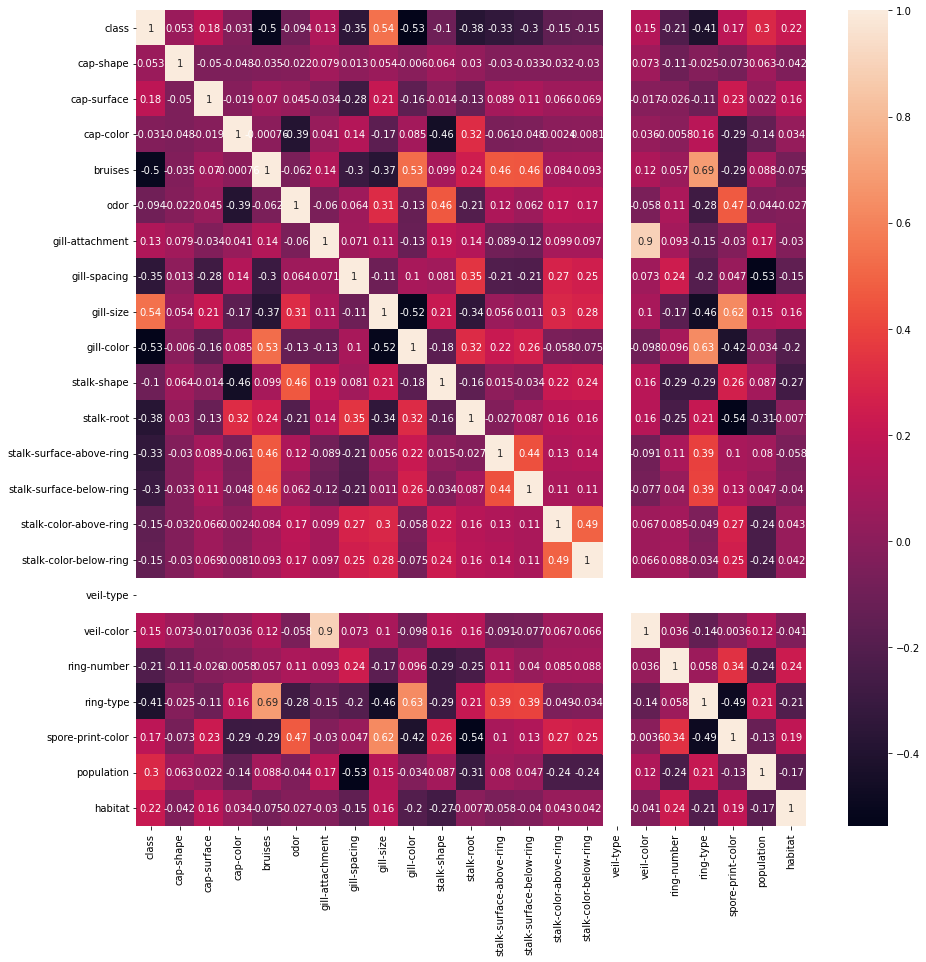

In [9]:
plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)

## Models (TensorFlow) & Plotting Loss and Accuracy Curves

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy, SparseCategoricalCrossentropy, BinaryCrossentropy

In [17]:
from sklearn.model_selection import train_test_split

data_X = data.drop("class", axis=1)
data_y = data["class"]

data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(data_X, data_y, test_size=0.2)

In [18]:
mdl1 = Sequential([
                   Dense(23, activation="relu", input_dim=data_X_train.shape[1]),
                   Dense(1, activation="sigmoid")
])

mdl1.compile(loss=BinaryCrossentropy(from_logits=True),
             optimizer="adam",
             metrics=["accuracy"])

In [19]:
hstry1 = mdl1.fit(data_X_train, data_y_train,
                  epochs=10,
                  validation_data=(data_X_test, data_y_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


204/204 [==============================] - 1s 2ms/step - loss: 0.4487 - accuracy: 0.8086 - val_loss: 0.3365 - val_accuracy: 0.8868
Epoch 2/10
 37/204 [====>.........................] - ETA: 0s - loss: 0.3165 - accuracy: 0.8868

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


204/204 [==============================] - 0s 2ms/step - loss: 0.2631 - accuracy: 0.9075 - val_loss: 0.2506 - val_accuracy: 0.9114
Epoch 3/10
204/204 [==============================] - 0s 2ms/step - loss: 0.2008 - accuracy: 0.9291 - val_loss: 0.2044 - val_accuracy: 0.9280
Epoch 4/10
204/204 [==============================] - 0s 1ms/step - loss: 0.1648 - accuracy: 0.9437 - val_loss: 0.1726 - val_accuracy: 0.9452
Epoch 5/10
204/204 [==============================] - 0s 2ms/step - loss: 0.1365 - accuracy: 0.9585 - val_loss: 0.1486 - val_accuracy: 0.9582
Epoch 6/10
204/204 [==============================] - 0s 2ms/step - loss: 0.1166 - accuracy: 0.9683 - val_loss: 0.1281 - val_accuracy: 0.9655
Epoch 7/10
204/204 [==============================] - 0s 1ms/step - loss: 0.0994 - accuracy: 0.9735 - val_loss: 0.1134 - val_accuracy: 0.9655
Epoch 8/10
204/204 [==============================] - 0s 1ms/step - loss: 0.0867 - accuracy: 0.9775 - val_loss: 0.0960 - val_accuracy: 0.9729
Epoch 9/10
204/20

In [20]:
def plot_loss_curves(hstry):
  acc = hstry.history["accuracy"]
  val_acc = hstry.history["val_accuracy"]
  loss = hstry.history["loss"]
  val_loss = hstry.history["val_loss"]
  epochs = range(len(hstry.history["loss"]))

  plt.figure(figsize=(6,3))
  plt.plot(epochs, acc, label="Training Acc")
  plt.plot(epochs, val_acc, label="Val Acc")
  plt.legend()
  plt.xlabel("Epochs")
  plt.ylabel("Accuracies")

  plt.figure(figsize=(6,3))
  plt.plot(epochs, loss, label="Training Loss")
  plt.plot(epochs, val_loss, label="Val Loss")
  plt.legend()
  plt.xlabel("Epochs")
  plt.ylabel("Losses")

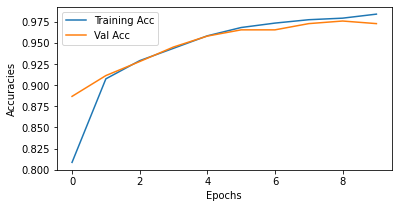

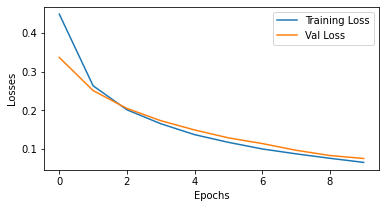

In [21]:
plot_loss_curves(hstry1)

If we increase the complexity of the model, can we reduce the number of epochs?

In [22]:
mdl2 = Sequential([
                  Dense(23, activation="relu", input_dim=data_X_train.shape[1]),
                  Dense(46, activation="relu"),
                  Dense(23, activation="relu"),
                  Dense(1, activation="sigmoid")
])

mdl2.compile(loss=BinaryCrossentropy(from_logits=True),
             optimizer="adam",
             metrics=["accuracy"])

In [23]:
hstry2 = mdl2.fit(data_X_train, data_y_train,
                  epochs=5,
                  validation_data=(data_X_test, data_y_test))

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


204/204 [==============================] - 1s 2ms/step - loss: 0.3712 - accuracy: 0.8595 - val_loss: 0.2184 - val_accuracy: 0.9329
Epoch 2/5
 44/204 [=====>........................] - ETA: 0s - loss: 0.1917 - accuracy: 0.9411

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


204/204 [==============================] - 0s 2ms/step - loss: 0.1486 - accuracy: 0.9475 - val_loss: 0.1039 - val_accuracy: 0.9643
Epoch 3/5
204/204 [==============================] - 0s 2ms/step - loss: 0.0669 - accuracy: 0.9820 - val_loss: 0.0564 - val_accuracy: 0.9889
Epoch 4/5
204/204 [==============================] - 0s 2ms/step - loss: 0.0341 - accuracy: 0.9908 - val_loss: 0.0323 - val_accuracy: 0.9926
Epoch 5/5
204/204 [==============================] - 0s 2ms/step - loss: 0.0194 - accuracy: 0.9943 - val_loss: 0.0189 - val_accuracy: 0.9932


Yes. It worked. In 5 epochs, accuracy is higher.

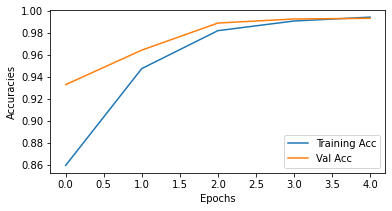

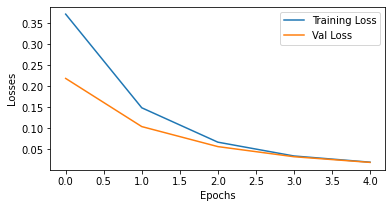

In [24]:
plot_loss_curves(hstry2)

In [31]:
mdl2 = Sequential([
                  Dense(23, activation="relu", input_dim=data_X_train.shape[1]),
                  Dense(46, activation="relu"),
                  Dense(23, activation="relu"),
                  Dense(1, activation="sigmoid")
])

mdl2.compile(loss=BinaryCrossentropy(from_logits=True),
             optimizer="adam",
             metrics=[tf.keras.metrics.AUC()])

hstry3 = mdl2.fit(data_X_train, data_y_train,
                  epochs=5,
                  validation_data=(data_X_test, data_y_test))

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


204/204 [==============================] - 1s 3ms/step - loss: 0.3627 - auc: 0.9188 - val_loss: 0.1848 - val_auc: 0.9816
Epoch 2/5
  1/204 [..............................] - ETA: 1s - loss: 0.1949 - auc: 0.9843

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


204/204 [==============================] - 0s 2ms/step - loss: 0.1169 - auc: 0.9916 - val_loss: 0.1009 - val_auc: 0.9932
Epoch 3/5
204/204 [==============================] - 1s 3ms/step - loss: 0.0585 - auc: 0.9972 - val_loss: 0.0509 - val_auc: 0.9975
Epoch 4/5
204/204 [==============================] - 1s 4ms/step - loss: 0.0345 - auc: 0.9989 - val_loss: 0.0271 - val_auc: 0.9992
Epoch 5/5
204/204 [==============================] - 1s 2ms/step - loss: 0.0179 - auc: 0.9998 - val_loss: 0.0176 - val_auc: 0.9998


AUC = 0.9998 !! Great!

In [ ]:
# from scikeras.wrappers import KerasClassifier

# def get_model(n_features):
#   mdl = Sequential([
#                     Dense(n_features, activation="relu", input_dim=data_X_train.shape[1]),
#                     Dense(n_features*2, activation="relu"),
#                     Dense(n_features, activation="relu"),
#                     Dense(1, activation="sigmoid")
#   ])
#   return mdl

# clf = KerasClassifier(get_model(23))
# clf.fit(data_X_train, data_y_train, epochs=5)
# y_proba = clf.predict_proba(data_X_test)

## Models (Scikit-Learn) & Plotting Accuracies


In [59]:
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [79]:
models = {"LinearSVC":LinearSVC(),
          "KNN":KNeighborsClassifier(),
          "SVC":svm.SVC(),
          "RandomForestClassifier":RandomForestClassifier()}

results = {}
predictions = {}

for model_name, model_fcn in models.items():
  model_fcn.fit(data_X_train, data_y_train)
  results[model_name] = model_fcn.score(data_X_test, data_y_test)
  predictions[model_name] = model_fcn.predict(data_X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [61]:
results

{'KNN': 0.9975384615384615,
 'LinearSVC': 0.9526153846153846,
 'RandomForestClassifier': 1.0,
 'SVC': 0.9889230769230769}

In [65]:
results.keys()

dict_keys(['LinearSVC', 'KNN', 'SVC', 'RandomForestClassifier'])

In [72]:
results_df = pd.DataFrame(data=results.values(), index=results.keys(), columns=["Accuracy"])
results_df

,Accuracy
LinearSVC,0.952615
KNN,0.997538
SVC,0.988923
RandomForestClassifier,1.000000


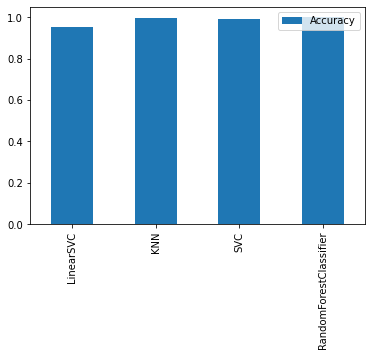

In [68]:
results_df.plot.bar();

Random Forest Clf has 100% accuracy!

In [77]:
predictions_df = pd.DataFrame(data=predictions.values(), index=predictions.keys())
predictions_df

,0,1,2,3,4,5,6,7,8,9,...,1615,1616,1617,1618,1619,1620,1621,1622,1623,1624
LinearSVC,0,0,0,1,0,0,1,1,0,1,...,0,1,1,0,0,1,1,0,1,1
KNN,0,0,0,1,0,0,1,1,0,1,...,0,1,1,0,0,1,1,0,1,1
SVC,0,0,0,1,0,0,1,1,0,1,...,0,1,1,0,0,1,1,0,1,1
RandomForestClassifier,0,0,0,1,0,0,1,1,0,1,...,0,1,1,0,0,1,1,0,1,1


### Cross Validation for Final Accuracy Score

In [80]:
from sklearn.model_selection import cross_val_score

X = data.drop("class", axis=1)
y = data["class"]

cross_val_scores = {}

for model_name, model_fcn in models.items():
  cross_val_scores[model_name] = np.mean(cross_val_score(model_fcn, X, y, cv=3))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [81]:
cross_val_scores

{'KNN': 0.8521664204825209,
 'LinearSVC': 0.8403495814869523,
 'RandomForestClassifier': 0.8754308222550469,
 'SVC': 0.7816346627277203}

These are much lower than previous accuracy scores because of cross validation.

In [82]:
cvs_df = pd.DataFrame(data=cross_val_scores.values(), index=cross_val_scores.keys(), columns=["Accuracies"])
cvs_df

,Accuracies
LinearSVC,0.840350
KNN,0.852166
SVC,0.781635
RandomForestClassifier,0.875431


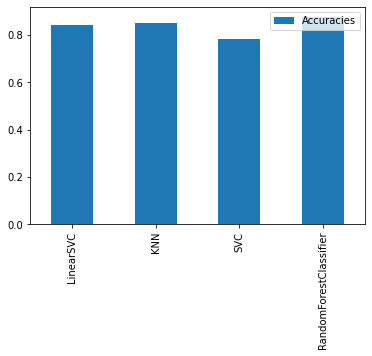

In [84]:
cvs_df.plot.bar();